## SYRCITYLINE DATA ANALYSIS

**BY TIA AND ELIZABETH**

### GOALS AND OBJECTIVES

For our final project, we used the “SYRCityline Requests (2021-Present)” dataset on data.syr.gov. This dataset is a collection of user-reported service requests submitted through Syracuse's CityLine program. Cityline is a tool that allows city residents to report non-emergency service requests such as public litter, illegal trash setouts and street sewage concerns. This tool was adopted by the city to allow residents to quickly resolve service issues within their community. Our ultimate goal with this analysis is to assess how well this tool works. Is the tool being used regularly by residents? Are issues acknowledged and resolved quickly? Has it empowered residents and improved their lives as it was intended to do? These are the type of questions we hope to answer. Additionally, we want to identify areas of potential improvement. For instance, what factors impact time of resolution when it comes to service requests, and can we find key indicators that will predict future issues. With a dataset containing months worth of information and updated frequently (almost daily) we are optimistic that we will come away with worthwhile analysis that leads to an improved community experience as well as a better quality of life for all Syracuse residents. Our specific questions are as follows:

1. Is the city reponding to service requests in a timely manner?
2. How can we improve performance?
    1. Look at agency imipact: Which agency completes the most requests? 
    2. Look at location and assignee impact: Is there a correlation between location and assignee name?
    3. Which agency completes the most requests?
    4.  What parts of town submit the most requests (south, east, north, west)?


### DATA SOURCES AND CHARACTERISTICS

This dataset is a collection of user reported service requests submitted through Syracuse's CityLine program. Cityline is a tool that allows city residents to report non-emergency service requests such as public litter, illegal trash setouts and street and sewage concerns. SeeClickFix software and data appears to be uploaded through this sofware.

*This dataset located on the Syracuse Open Data website at: https://data.syr.gov/datasets/0d58a53ccb22457990161d756ed8a870_0/about .*


### Data Dictionary:

1. Id - Identification number assigned to each incident

2. Summary - String that users select to categorize the nature of their complaint.  Can be either Large or Bulk Items, Illegal Setouts, Sewer Back-ups, Weekly Trash Pickup, Large or Bulk Items - Skipped Pickup, Home & Building Maintenance, Sewer-related Concerns, Recyclling, Other Housing & Property Maintenance Concern, Streeth Lights, or Other.  

3. Rating - The number of followers on the Request in SeeClickFix.

4. Address - Address of the service request or complaint, provided by the community member.

5. Description - Write up of the service request or complaint, provided by the community member.

6. Agency Name - What type of City Department was this complaint assigned to.  These include: 
- Streets, Sidewalks & Transportation
- Garbage, Recycling & Graffiti
- Housing & Property Maintenance
- Feedback to the City
- Parking & Vehicles
- Green Spaces, Trees & Public Utilities
- Water & Sewage
- Animals

7. Request type - ID number associated with the specific 'Summary' category a user selects

8. URL - Unique website address (url) that the complaint as well as comments from the City personnel can be viewed at.

9. Lat - Latitude GPS coordinate where the address is.

10. Lng - Longitude GPS coordinate where the address is.

11. Export tagged places - Which quadrant of the city is this address matched to (Northeast, Southeast, Northwest, or Southwest).

12. Created at local - When this complaint or service was requested.  (This is also in the format of *MM/DD/YYYY - HH:MM(AM/PM*)).

13. Acknowledged at local - When this complaint or service request was acknowledged by the City department.  

14. Closed at local - When this complaint or service request was marked as being closed by the City department.

15. Minutes to acknowledged - The amount of time, in minutes, after it was Created at Local to being marked Acknowledged at local.

16. Minutes to closed - The amount of time, in minutes,  after service request was created at local to when it was marked as Closed at local. 

17. Assignee name - Which city Department was assigned to this request.  

18. Category - How was this request categorized.  This can be Potholes, Large or Bulk Items, Water-related Concerns, Home & Building Maintenance, Street Lights, Weekly Trash Pickup, Public Trash Can, Yard Waste, Report Litter on Private Land,  among other categories.

19. SLA in Hours - This is the limit assigned by the City of Syracuse, that puts a limit on how long a request can stay in the list of tasks untouched. That amount of time, in hours, SeeClickFix will forward the request to the department head as well as an administrator to help ensure that requests are addressed in a timely manner.

20. Report Source - How this service request was obtained: Either Web-Mobile, iPhone, Portal, Web-Desktop, Android, or Request Form.*

### IMPORTING LIBRARIES

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### UPLOAD AND VIEW DATASET

In [36]:
#Upload csv dataset

filepath = "SYRCityline_Requests_(2021-Present).csv"
cityline_original=pd.read_csv(filepath)

In [37]:
#Quick look at dataset size: There are 23 columns and 68,505 rows.

cityline_original.shape

(68505, 23)

In [38]:
#Get a quick view of dataset info include names of each column, data types, and non-null count.

cityline_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68505 entries, 0 to 68504
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   X                        68429 non-null  float64
 1   Y                        68429 non-null  float64
 2   Id                       68505 non-null  int64  
 3   Summary                  68505 non-null  object 
 4   Rating                   68505 non-null  int64  
 5   Address                  68429 non-null  object 
 6   Description              58300 non-null  object 
 7   Agency_Name              68505 non-null  object 
 8   Request_type             68505 non-null  int64  
 9   URL                      68505 non-null  object 
 10  Lat                      68429 non-null  float64
 11  Lng                      68429 non-null  float64
 12  Export_tagged_places     68429 non-null  object 
 13  Created_at_local         68505 non-null  object 
 14  Acknowledged_at_local 

### TRANSFORMING AND CLEANING OUR DATA

#### Transforming
Our first step in working with the data is transforming all the dates in our dataset so we can use them for our analysis. We accomplished this using the to_datetime() function with our time variables ('Created_at_local','Closed_at_local' and Acknowledged_at_local'), which converted the date strings into the pandas standard datetime format ('YYYY-MM-DD HH:MM:SS - year, month, day, hours, minutes, seconds). Once converted, new columns were created with this new format ('Date_Subitted','Date_Resolved' and Acknowledge_Date'). The next step was to separate the date and time information into separate columns, which we accomplish by using the dt.time and dt.date functions.

After transforming our data, we performed some basic math operations on the 'Sla_in_hours' and 'Minutes_to_closed" columns to break them into our desired time measurements. We broke SLA into minutes and days, and the minutes to closed into hours. Additionally, we also used the np.where function and Boolean operators, which allowed us to create Y/N columns using specified conditions, from the SLA ('Sla_in_minutes'), Assigned ('Assignee_name'), and Acknowledged ('Date_Acknowledged') columns. Lastly, we created bins and labels, then used the .cut function to create a new column that categorizes the 'Days_to_closed' column by: *'Less Than a Day', 'A Few Days', 'One Week', 'Two Weeks', 'Three Weeks', 'Four Weeks', 'More than 30 Days'*.


#### Cleaning
After creating our columns, we created a new dataset from the original, pulling only the columns we would need for our analysis. Next, we dealt with our NAs. We decided to ignore the 21,387 and 56,099 NAs in the 'Assignee' and 'Acknowledged' columns as they would not impact our analysis and determined it would be most necessary to drop all NAs from:'Lat','Lng', 'Sla_in_minutes', 'Sla_in_hours', 'Sla_in_days' and 'Export_tagged_places.' These NAs would affect our analysis the most (we want to hone in on SLA) and luckily there weren't too many to remove. Next, we renamed values in the 'Export_tagged_places' column. Because the data in this column was so inconsistent, we used the .unique and .loc functions to identify all inconsistencies and to rename the values so that the column only consisted of the directionals: 'Northwest', 'Northeast', 'Southwest' and 'Southeast.' The 16 values that could not be updated into one of these categories, were marked as NAs and dropped. 

At the end of the transformation and clean up, we were left with 68,390 rows and 24 columns. 



### TRANSFORMING THE DATA

**Splitting Date & TIme**

In [39]:
#transform to date format

cityline_original['Date_Submitted'] = pd.to_datetime(cityline_original['Created_at_local'])
cityline_original['Date_Resolved'] = pd.to_datetime(cityline_original['Closed_at_local'])
cityline_original['Acknowledge_Date'] = pd.to_datetime(cityline_original['Acknowledged_at_local'])

#Splitting up the date/time data to create separate columns for date and time data

#Split the Date_Submitted column
cityline_original['Time_Submitted'] = cityline_original['Date_Submitted'].dt.time
cityline_original['Date_Submitted'] = cityline_original['Date_Submitted'].dt.date

#Split the Date_Resolved column
cityline_original['Time_Resolved'] = cityline_original['Date_Resolved'].dt.time
cityline_original['Date_Resolved'] = cityline_original['Date_Resolved'].dt.date

#Split the Acknowledge_Date column
cityline_original['Time_Acknowledged'] = cityline_original['Acknowledge_Date'].dt.time
cityline_original['Date_Acknowledged'] = cityline_original['Acknowledge_Date'].dt.date


**Adding New Columns**

In [40]:
#Add column with SLA to minutes
cityline_original['Sla_in_minutes'] = cityline_original['Sla_in_hours'] * 60 #Create a new column where SLA is broken down into minutes, not hours

#add new column for SLA to days
cityline_original['Sla_in_days'] = cityline_original['Sla_in_hours'] / 24 #Create a new column where SLA is broken down into days, not hours

#add new column time to closed to hours
cityline_original['Hours_to_closed'] = cityline_original['Minutes_to_closed'] / 60 #Create a new column where closed time broken down into hours, not minutes

#Add new columns time to closed to days
cityline_original['Days_to_closed'] = cityline_original['Hours_to_closed'] / 24 #Create a new column where closed time broken down into days, not minutes

#Add new column named "Met SLA Requirements "
cityline_original['Sla_met'] = np.where(cityline_original['Sla_in_minutes'] > cityline_original['Minutes_to_closed'], "Y", "N") #this code marks "Y" or "N" on whether sla was met

#Add new column whether task was assigned"
cityline_original['Assigned'] = np.where(cityline_original['Assignee_name'].isnull(), "N", "Y") #this code marks "Y" or "N" on whether task was assigned

#Add new column whether task was acknowledged"
cityline_original['Acknowledged'] = np.where(cityline_original['Date_Acknowledged'].isnull(), "N", "Y") #this code marks "Y" or "N" on whether task was acknowledged

#Adding Column for Month
cityline_original['Date_Resolved'] = pd.to_datetime(cityline_original['Date_Resolved'])
cityline_original['Month_Resolved'] = cityline_original['Date_Resolved'].dt.month


#CREATE BIN GROUPS: Creating bins/labels for set time periods
bins = [-1, 1, 4, 8, 15, 22, 31, float('inf')]
labels = ['Less Than a Day', 'A Few Days', 'One Week', 'Two Weeks', 'Three Weeks', 'Four Weeks', 'More than 30 Days']

values = cityline_original.Days_to_closed
cityline_original['Closed_Category'] = pd.cut(values, bins=bins, labels=labels)

cityline_original.head(3)

,X,Y,Id,Summary,Rating,Address,Description,Agency_Name,Request_type,URL,...,Date_Acknowledged,Sla_in_minutes,Sla_in_days,Hours_to_closed,Days_to_closed,Sla_met,Assigned,Acknowledged,Month_Resolved,Closed_Category
0,-8.472084e+06,5.318440e+06,10514161,Water-related Concerns,3,"2838 E Genesee St Syracuse, NY, 13224, USA",cracked sewer line going from road to the hous...,Water & Sewage,33849,https://crm.seeclickfix.com/#/organizations/15...,...,2021-07-30,1440.0,1.0,191.416667,7.975694,N,Y,Y,8.0,One Week
1,-8.476508e+06,5.314388e+06,10514193,Large or Bulk Items,2,"218 W Calthrop Ave Syracuse, NY, 13205, USA",mattress,"Garbage, Recycling & Graffiti",33854,https://crm.seeclickfix.com/#/organizations/15...,...,NaT,2880.0,2.0,73.200000,3.050000,N,Y,N,7.0,A Few Days
2,-8.475602e+06,5.310706e+06,10514235,Roadkill,2,"108 Windemere Rd Syracuse, NY, 13205, USA",ground hog,Animals,33845,https://crm.seeclickfix.com/#/organizations/15...,...,NaT,1440.0,1.0,20.500000,0.854167,Y,Y,N,7.0,Less Than a Day


### CLEANING THE DATA

**PULLING ONLY THE COLUMS THAT WE NEED AND OMITTING THE REST**

In [41]:
#Use copy to create new dataframe containing only the columns we plan to use
cityline = cityline_original[['Lat','Lng','Summary','Agency_Name','Assignee_name','Assigned','Report_Source','Export_tagged_places','Date_Submitted', 'Time_Submitted','Acknowledged','Date_Acknowledged','Time_Acknowledged','Date_Resolved', 'Time_Resolved',
                              'Minutes_to_acknowledged','Minutes_to_closed','Sla_in_minutes','Hours_to_closed','Days_to_closed','Closed_Category','Sla_in_days','Sla_met','Sla_in_hours']]


#Create a copy of the dataframe
cityline = cityline.copy()

**DEALING WITH NAs/MISSING DATA**

In [42]:
#Checking dataset for missing data. isnull() + sum(), gives us a total count of NAs in our dataset per column.
cityline.isnull().sum()

Lat                           76
Lng                           76
Summary                        0
Agency_Name                    0
Assignee_name              21387
Assigned                       0
Report_Source                  0
Export_tagged_places          76
Date_Submitted                 0
Time_Submitted                 0
Acknowledged                   0
Date_Acknowledged          56099
Time_Acknowledged          56099
Date_Resolved                554
Time_Resolved                554
Minutes_to_acknowledged    56099
Minutes_to_closed            590
Sla_in_minutes                23
Hours_to_closed              590
Days_to_closed               590
Closed_Category              590
Sla_in_days                   23
Sla_met                        0
Sla_in_hours                  23
dtype: int64

In [43]:
#Drop NAs for Lat, Lng, Sla & Export_tagged_places, Sla_in_hours & sla_in_days:

cityline.dropna(subset=['Lat','Lng', 'Sla_in_minutes','Sla_in_hours','Sla_in_days','Export_tagged_places'], inplace=True)

#WE CHOSE TO KEEP NAs FROMTHE FOLLOWING COLUMNS - NAs do not matter in these columns and therefore do not need to be removed
#Assignee_name
#Date Acknowledged 
#Time Acknowledged 
#Time_Resolved
#Date_Resolved 
#Minutes to Acknowledged
#Minutes to closed
#Hours to closed
#Days to closed
#Closed Category

In [44]:
#Verify that nulls have been dropped
cityline.isnull().sum()

Lat                            0
Lng                            0
Summary                        0
Agency_Name                    0
Assignee_name              21372
Assigned                       0
Report_Source                  0
Export_tagged_places           0
Date_Submitted                 0
Time_Submitted                 0
Acknowledged                   0
Date_Acknowledged          56046
Time_Acknowledged          56046
Date_Resolved                543
Time_Resolved                543
Minutes_to_acknowledged    56046
Minutes_to_closed            578
Sla_in_minutes                 0
Hours_to_closed              578
Days_to_closed               578
Closed_Category              578
Sla_in_days                    0
Sla_met                        0
Sla_in_hours                   0
dtype: int64

**RENAMING VALUES WITHIN 'EXPORT_TAGGED_PLACES'**

In [45]:
#View all unique data in "Export tagged places" column
cityline.Export_tagged_places.unique()

array(["Southeast Quadrant,Syracuse,Syracuse Boundary(don't use this)",
       "Southwest Quadrant,Syracuse,Syracuse Boundary(don't use this)",
       "Northeast Quadrant,Syracuse,Syracuse Boundary(don't use this)",
       "Northwest Quadrant,Syracuse,Syracuse Boundary(don't use this)",
       "Syracuse Boundary(don't use this)",
       "Syracuse,Syracuse Boundary(don't use this)",
       "Southwest Quadrant,Syracuse Boundary(don't use this)",
       'Southeast Quadrant',
       "Northeast Quadrant,Syracuse Boundary(don't use this)",
       "Southeast Quadrant,Syracuse Boundary(don't use this)",
       "Northwest Quadrant,Syracuse Boundary(don't use this)"],
      dtype=object)

In [46]:
#Rename values that are the so data is uniform. This column should only consist of the Northwest, Northeast, Southwest, and Southeast.
#Any data that does not match will be updated, that way counts can be run correctly
#In our code be low, we are search for key words using str.contains, and renaming them appropriately. 

cityline.loc[cityline['Export_tagged_places'].str.contains('Northwest'), 'Export_tagged_places'] = 'Northwest' 
cityline.loc[cityline['Export_tagged_places'].str.contains('Northeast'), 'Export_tagged_places'] = 'Northeast'

cityline.loc[cityline['Export_tagged_places'].str.contains('Southeast'), 'Export_tagged_places'] = 'Southeast'
cityline.loc[cityline['Export_tagged_places'].str.contains('Southwest'), 'Export_tagged_places'] = 'Southwest'


#As seen above, we have data that says "Syracuse Boundary" and "Syracuse,Syracuse", we are unsure how to categorize, so we will mark these as NAs
cityline.loc[cityline['Export_tagged_places'].str.contains('Syracuse'), 'Export_tagged_places'] = np.nan 

In [47]:
#There are 16 rows we were unable to categorize
cityline.Export_tagged_places.isnull().sum()

16

In [48]:
#Quick view of our data
cityline.head()

,Lat,Lng,Summary,Agency_Name,Assignee_name,Assigned,Report_Source,Export_tagged_places,Date_Submitted,Time_Submitted,...,Time_Resolved,Minutes_to_acknowledged,Minutes_to_closed,Sla_in_minutes,Hours_to_closed,Days_to_closed,Closed_Category,Sla_in_days,Sla_met,Sla_in_hours
0,43.042478,-76.106022,Water-related Concerns,Water & Sewage,Superintendent of Sewers,Y,Request Form,Southeast,2021-07-27,11:30:00,...,10:55:00,4369.0,11485.0,1440.0,191.416667,7.975694,One Week,1.0,N,24.0
1,43.015874,-76.145769,Large or Bulk Items,"Garbage, Recycling & Graffiti",Sanitation_KT,Y,Request Form,Southwest,2021-07-27,11:33:00,...,12:46:00,NaN,4392.0,2880.0,73.200000,3.050000,A Few Days,2.0,N,48.0
2,42.991685,-76.137628,Roadkill,Animals,Superintendent of Street Cleaning,Y,Request Form,Southeast,2021-07-27,11:39:00,...,08:10:00,NaN,1230.0,1440.0,20.500000,0.854167,Less Than a Day,1.0,Y,24.0
3,43.037208,-76.124196,Large or Bulk Items,"Garbage, Recycling & Graffiti",NaN,N,Request Form,Southeast,2021-07-27,11:41:00,...,14:22:00,NaN,31840.0,2880.0,530.666667,22.111111,Four Weeks,2.0,N,48.0
4,43.037208,-76.124196,Construction Debris,"Garbage, Recycling & Graffiti",Superintendent of Street Cleaning,Y,Request Form,Southeast,2021-07-27,11:43:00,...,09:26:00,2860.0,30103.0,5760.0,501.716667,20.904861,Three Weeks,4.0,N,96.0


In [49]:
#Remove the NAs we created above from Export_tagged_places
cityline.dropna(subset=['Export_tagged_places'], inplace=True)

#Review to make sure NAs are gone
cityline.Export_tagged_places.isnull().sum()

0

In [50]:
#Lets review our new shape
cityline.shape

(68390, 24)

In [51]:
cityline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68390 entries, 0 to 68504
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Lat                      68390 non-null  float64       
 1   Lng                      68390 non-null  float64       
 2   Summary                  68390 non-null  object        
 3   Agency_Name              68390 non-null  object        
 4   Assignee_name            47024 non-null  object        
 5   Assigned                 68390 non-null  object        
 6   Report_Source            68390 non-null  object        
 7   Export_tagged_places     68390 non-null  object        
 8   Date_Submitted           68390 non-null  object        
 9   Time_Submitted           68390 non-null  object        
 10  Acknowledged             68390 non-null  object        
 11  Date_Acknowledged        12359 non-null  object        
 12  Time_Acknowledged        12359 non-nu

**FINDING THE EARLIEST AND LATEST DATES IN OUR DATASET?**

In [53]:
# Checking for min and max dates in our data set
#Convert the "Date Submitted" column into pandas datetime format and assign it to "date"
date = pd.to_datetime(cityline['Date_Submitted'], format='%Y-%m-%d')

#Pull earliest and latest dates using .min and .max
earliest_date = date.min()
latest_date =date.max()

print("Earliest Date:",earliest_date) #June 2023
print("Latest Date:",latest_date) #Aug 2023

Earliest Date: 2021-06-15 00:00:00
Latest Date: 2023-08-15 00:00:00


**FILTERING OUT DATASETS BASED ON YEAR: Creating 2022 & 2023 Datasets**  


In [73]:
# Convert the 'Date' column to datetime format
cityline['Date_Submitted'] = pd.to_datetime(cityline['Date_Submitted'], format='%Y-%m-%d')

#Filter to only keep data from Jan 2022 - June 2023
cityline = cityline.loc[(cityline['Date_Submitted'] >= '2022-01-01')
                     & (cityline['Date_Submitted'] <= '2023-06-30')]

cityline22 = cityline.loc[(cityline['Date_Submitted'] >= '2022-01-01')
                     & (cityline['Date_Submitted'] < '2023-01-01')]

cityline23 = cityline.loc[(cityline['Date_Submitted'] > '2022-12-31')
                     & (cityline['Date_Submitted'] <= '2023-06-30')]

In [81]:
cityline22.shape

(32103, 24)

In [80]:
cityline23.shape

(16411, 24)

In [83]:
date23 = pd.to_datetime(cityline23['Date_Submitted'], format='%Y-%m-%d')
#Pull earliest and latest dates using .min and .max
earliest_date23 = date23.min()
latest_date23 =date23.max()

print("Earliest Date:",earliest_date23) #June 2023
print("Latest Date:",latest_date23) #Aug 2023

Earliest Date: 2023-01-01 00:00:00
Latest Date: 2023-06-30 00:00:00


### EXPLORATORY

## ANALYSIS

Before diving into our analysis, we created 3 new datasets based on dates. We chose to omit all 2021 dates, because data collection began halfway through 2021 (in June). We kept all 2022 and 2023 data because these years had data from all or most of the year.


2022 - used for model to predict 202, also only data with full year
2023 - just for charts and to compare with model
2022/2023 - not sure yet

**1. Is the city reponding to service requests in a timely manner?**
(SLA focused, overall and agency breakdown *note:
- most getting acknowledged in a timely mannner. 
- any agencies worse than others? 
- SLA impacts overall resolution times (correlation chart?)
    
For our first graph, we looked at the SLA ratios for 2022 (cityline22) and 2023 (cityline23). The city of Syracuse assignes a limit on how long requests can stay untouched which is identified in the 'Sla_in_hours' column. The 'Sla_met' column was created to mark tickets with either a Y or a N if the issue was reviewed within necessary time limit. For 2022, SLA was met 76% of the time and for 2023 SLA was met 68% of the time. We felt like this was not the worst percentage, but the could be better. We then looked at SLA fulfillment by agency. There are 9 agencies that are responsible for several different ticket types that fall under various department and individuals. In 2022, the top performing agencies that had SLA met above 70% were Water & Sewage with 89% met SLA and Garbage, Recycling & Graffiti with 77%. In 2023, Garbage, Recycling & Graffiti met its SLA 82% of the time and Housing & Property Maintenance 75%. The SLA is important because if affects average resolution time. Whenever SLA is no met, the average resolution time increases. 


2. How can we improve performance?
    Which agency completes the most requests?
    Look at location and assignee impact: Is there a correlation between location and assignee name?
    What parts of town submit the most requests (south, east, north, west)?
    
After looking at the initial charts, we wanted to determine what factors were impacting SLA performance. First we looked at the number of requests each agency received. The top 3 agencies in 2022 and 2023 were the same. The agencies with the best SLA performance had he most requests.

**2022 Results**
1.Garbage, Recycling & Graffiti             21322
2.Water & Sewage                             5094
3.Streets, Sidewalks & Transportation        2466


**2023 Results**
1.Garbage, Recycling & Graffiti             9394
2.Water & Sewage                            3240
3.Streets, Sidewalks & Transportation       1506

*Which agency has the most assignees: the top agency has the most assignees. Is this important?
*SLA Range: Is the number of requests per SLA type important
*Tie in location: Will side of town make a difference when it comes to SLA

**Ratio of SLA met for 2022 and 2023**

In [59]:
total_sla22 =cityline22.Sla_met.value_counts(normalize=True)*100

total_sla22

Sla_met
Y    76.083232
N    23.916768
Name: proportion, dtype: float64

In [112]:
#Get the percentage of SLA met data in 2022
total_sla22 =cityline22.Sla_met.value_counts(normalize=True)*100
plot1=total_sla22.plot.bar()

In [109]:
total_sla23 =cityline23.Sla_met.value_counts(normalize=True)*100

total_sla23

Sla_met
Y    68.295655
N    31.704345
Name: proportion, dtype: float64

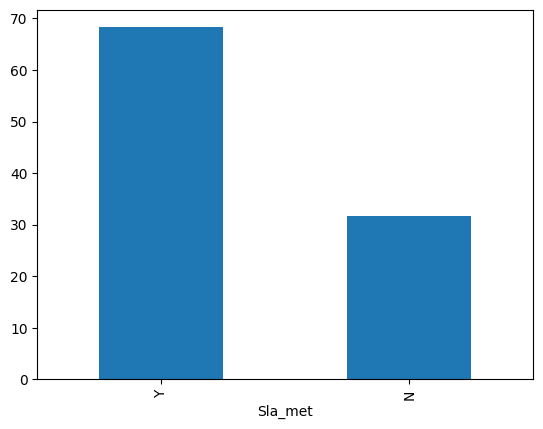

In [66]:
#Get the percentage of SLA met data in 2023


total_sla23 =cityline23.Sla_met.value_counts(normalize=True)*100
plot2=total_sla23.plot.bar()

**Ratio of SLA met by Agency for 2022 and 2023**

In [114]:
#SLA ratio by agency - 2022
#Create seperate datas of "Y" and "N" sla-met status
Yes = cityline22[cityline22['Sla_met'] =='Y']
No = cityline22[cityline22['Sla_met'] =='N']

#Get totals
y = Yes.Agency_Name.value_counts()
n = No.Agency_Name.value_counts()

#Add data back into a single dataframe
agencySLA = pd.DataFrame({ 'Y' : y, 'N' : n, })

# Calculate the percentage of 'Y' and 'N' values for each agency row-wise
agencySLA['Total'] = agencySLA.sum(axis=1)  # Calculate total counts for each row
agencySLA['Y_Percentage'] = (agencySLA['Y'] / agencySLA['Total']) * 100
agencySLA['N_Percentage'] = (agencySLA['N'] / agencySLA['Total']) * 100

# Drop the 'Total' column if it's not needed
#agencySLA.drop('Total', axis=1, inplace=True)

agencySLA

,Y,N,Total,Y_Percentage,N_Percentage
Agency_Name,,,,,
Animals,78,74,152,51.315789,48.684211
Feedback to the City,27,63,90,30.000000,70.000000
"Garbage, Recycling & Graffiti",16479,4843,21322,77.286371,22.713629
"Green Spaces, Trees & Public Utilities",306,168,474,64.556962,35.443038
"Health, Safety & Social Services",11,15,26,42.307692,57.692308
Housing & Property Maintenance,1502,779,2281,65.848312,34.151688
Parking & Vehicles,100,98,198,50.505051,49.494949
"Streets, Sidewalks & Transportation",1343,1123,2466,54.460665,45.539335
Water & Sewage,4579,515,5094,89.890067,10.109933


In [ ]:
ax = agencySLA[['Y', 'N']].plot.bar()

In [116]:
#SLA ratio by agency - 2023
#Create seperate datas of "Y" and "N" sla-met status
Yes23 = cityline23[cityline23['Sla_met'] =='Y']
No23 = cityline23[cityline23['Sla_met'] =='N']

#Get totals
y23 = Yes23.Agency_Name.value_counts()
n23 = No23.Agency_Name.value_counts()

#Add data back into a single dataframe
agencySLA23 = pd.DataFrame({ 'Y' : y23, 'N' : n23, })

# Calculate the percentage of 'Y' and 'N' values for each agency row-wise
agencySLA23['Total'] = agencySLA23.sum(axis=1)  # Calculate total counts for each row
agencySLA23['Y_Percentage'] = (agencySLA23['Y'] / agencySLA23['Total']) * 100
agencySLA23['N_Percentage'] = (agencySLA23['N'] / agencySLA23['Total']) * 100

# Drop the 'Total' column if it's not needed
#agencySLA.drop('Total', axis=1, inplace=True)

agencySLA23

,Y,N,Total,Y_Percentage,N_Percentage
Agency_Name,,,,,
Animals,109,63,172,63.372093,36.627907
Feedback to the City,16,20,36,44.444444,55.555556
"Garbage, Recycling & Graffiti",7711,1683,9394,82.084309,17.915691
"Green Spaces, Trees & Public Utilities",262,171,433,60.508083,39.491917
"Health, Safety & Social Services",9,13,22,40.909091,59.090909
Housing & Property Maintenance,1125,360,1485,75.757576,24.242424
Parking & Vehicles,44,79,123,35.772358,64.227642
"Streets, Sidewalks & Transportation",655,851,1506,43.492696,56.507304
Water & Sewage,1277,1963,3240,39.413580,60.586420


In [ ]:
ax23 = agencySLA23[['Y', 'N']].plot.bar()

**Average Resolved Time by Agency for 2022 and 2023**

In [117]:
#DOES ACKNOWLEDGEMENT MATTER? - IT APPEARS THAT IT DOES

#Group by calculate the mean of Days to closed
grouped_df3 = cityline22.groupby(['Agency_Name', 'Acknowledged'])['Days_to_closed'].mean().reset_index()

# Round the mean values to the nearest tenth
grouped_df3.columns = ['Agency Name', 'Acknowleged','Average Days to Closed']
grouped_df3['Average Days to Closed'] = grouped_df3['Average Days to Closed'].round(1)

print(grouped_df3)


                               Agency Name Acknowleged  Average Days to Closed
0                                  Animals           N                     5.3
1                                  Animals           Y                     8.7
2                     Feedback to the City           N                     9.7
3                     Feedback to the City           Y                    28.4
4            Garbage, Recycling & Graffiti           N                     1.7
5            Garbage, Recycling & Graffiti           Y                     4.3
6   Green Spaces, Trees & Public Utilities           N                     9.5
7   Green Spaces, Trees & Public Utilities           Y                    29.5
8         Health, Safety & Social Services           N                     3.8
9         Health, Safety & Social Services           Y                    31.0
10          Housing & Property Maintenance           N                     5.1
11          Housing & Property Maintenance          

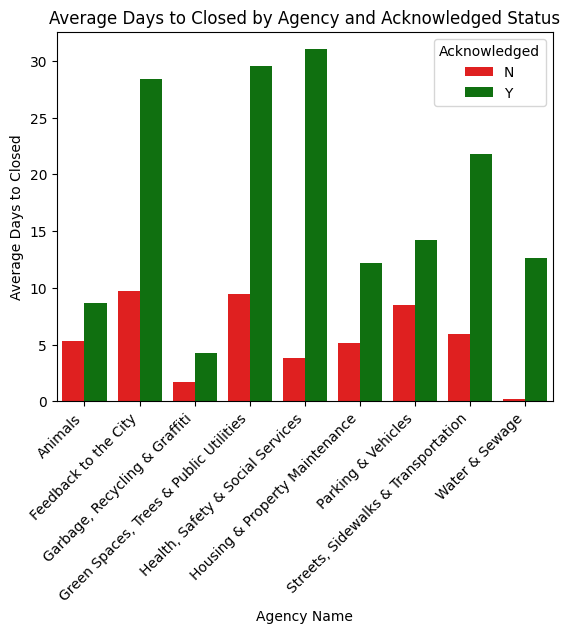

In [104]:

colors = {'Y': 'green', 'N': 'red'}  # Define colors for Acknowledged categories

# Use seaborn's barplot for better aesthetics
import seaborn as sns

sns.barplot(x='Agency Name', y='Average Days to Closed', hue='Acknowleged', data=grouped_df3, palette=colors)

plt.title('Average Days to Closed by Agency and Acknowledged Status')
plt.xlabel('Agency Name')
plt.ylabel('Average Days to Closed')
plt.legend(title='Acknowledged', loc='upper right')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

**Count of issues per agency for 2023 adn 2022**

In [118]:
#Count of agencies
#Most complaints to to the Garbage, Recycling & Graffiti Dept.
cityline22['Agency_Name'].value_counts()

Agency_Name
Garbage, Recycling & Graffiti             21322
Water & Sewage                             5094
Streets, Sidewalks & Transportation        2466
Housing & Property Maintenance             2281
Green Spaces, Trees & Public Utilities      474
Parking & Vehicles                          198
Animals                                     152
Feedback to the City                         90
Health, Safety & Social Services             26
Name: count, dtype: int64

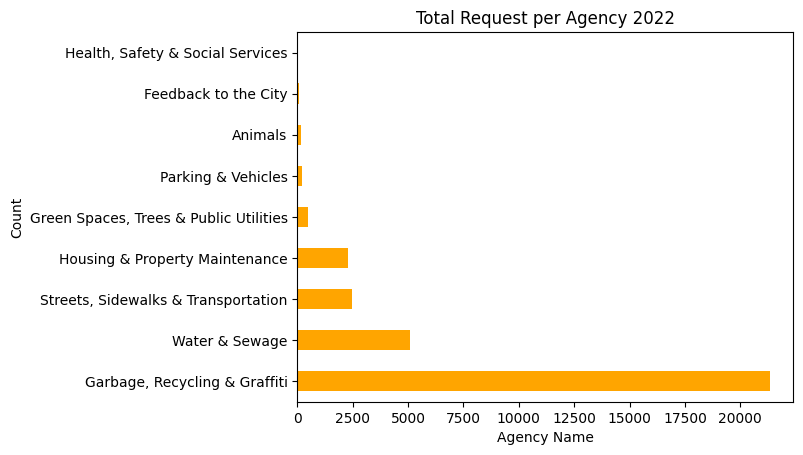

<Figure size 1800x900 with 0 Axes>

In [124]:
cityline22['Agency_Name'].value_counts().plot.barh(color="orange")
#Most complaints to to the Garbage, Recycling & Graffiti Dept.

plt.title('Total Request per Agency 2022')
plt.xlabel('Agency Name')
plt.ylabel('Count')
plt.figure(figsize=(18, 9))
plt.show()

**Ratio of SLA met requests by month**

In [125]:
#Count of agencies- 2023
#Most complaints to to the Garbage, Recycling & Graffiti Dept.
cityline23['Agency_Name'].value_counts()

Agency_Name
Garbage, Recycling & Graffiti             9394
Water & Sewage                            3240
Streets, Sidewalks & Transportation       1506
Housing & Property Maintenance            1485
Green Spaces, Trees & Public Utilities     433
Animals                                    172
Parking & Vehicles                         123
Feedback to the City                        36
Health, Safety & Social Services            22
Name: count, dtype: int64

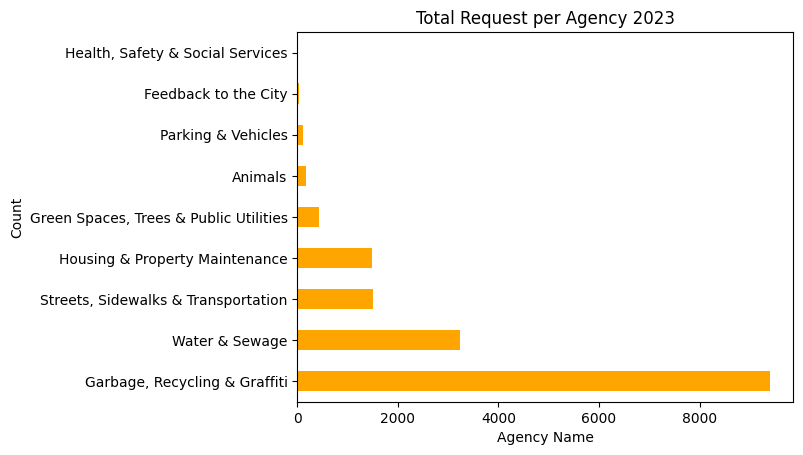

<Figure size 1800x900 with 0 Axes>

In [123]:
cityline23['Agency_Name'].value_counts().plot.barh(color="orange")
#Most complaints to to the Garbage, Recycling & Graffiti Dept.

plt.title('Total Request per Agency 2023')
plt.xlabel('Agency Name')
plt.ylabel('Count')
plt.figure(figsize=(18, 9))
plt.show()

In [32]:
#Get Ratio of SLA met requests by month
cityline22.set_index("Date_Resolved", inplace=True) #set Date resolved column as index

#group and count data sla met and agency name by month. Use unstack to remove data from index and fillna to take care of any nas in data
monthly_issues = cityline22.groupby([pd.Grouper(freq='M'), 'Sla_met'])['Agency_Name'].count().unstack().fillna(0) 

monthly_issues

#Make values percentages
percentSLA = monthly_issues.div(monthly_issues.sum(axis=1), axis=0)
percentSLA

Sla_met,N,Y
Date_Resolved,,
2022-01-31,0.181597,0.818403
2022-02-28,0.276467,0.723533
2022-03-31,0.287399,0.712601
2022-04-30,0.323050,0.676950
2022-05-31,0.264934,0.735066
2022-06-30,0.318111,0.681889
2022-07-31,0.303392,0.696608
2022-08-31,0.209356,0.790644
2022-09-30,0.092311,0.907689


**SLA ratio by agency**

###   DATA RUNDOWN FOR 2022 ### 

#Count of agencies and assignees - Done  
#Count of assignee per agency - Done  
#Count of issues by agency name  - AGENCY WITH THE MOST REQUESTS, Certain agencies handle way more requests than others - Done  
#Count of issues by month  - MONTH WITH THE MOST REQUESTS, anything notable - Done
#Count of submissions by request type - how do requests get looked at  - most people still prefer to submit paper forms versus electronic - Done  
#Sla range for each category - which agencies take the longest - Done  
**#Avg Resolution Time by agency name  QUICKEST AGENCIES, certain agencies require more time to resolve issues than others wide spread** 
 



**What we learned**  
#Agency that received the most requests = Garbage, Recycling & Graffiti Dept.  
#Requests were assgined out to 56 different indiviuals and teams  
#September received the most requests and requests declined from there  
#Majority of requests get submitted by paper form  
#SLAs range from 24 to 1344 hours
#SLA are likely tied to assignee type

**Count of agencies and assignees**

In [19]:
#Count of agencies and assignees 

agencyCount = cityline22.Agency_Name.nunique()
assigneeCount = cityline22.Assignee_name.nunique()

print(agencyCount)
print(assigneeCount)

9
56


**Count of assignee per agency**

In [20]:
#Count of assignee per agency 

# Use groupby and count to get the count of assignee per agency 2022 DATA 
count_assignee= cityline22.groupby('Agency_Name')['Assignee_name'].nunique().reset_index()

# Rename the columns for clarity (optional)
count_assignee.columns = ['Category', '# of Potential Asignees']

print(count_assignee)

                                 Category  # of Potential Asignees
0                                 Animals                        9
1                    Feedback to the City                       23
2           Garbage, Recycling & Graffiti                       31
3  Green Spaces, Trees & Public Utilities                       25
4        Health, Safety & Social Services                        8
5          Housing & Property Maintenance                       32
6                      Parking & Vehicles                       11
7     Streets, Sidewalks & Transportation                       36
8                          Water & Sewage                        8


**Count of issues per month**

In [23]:
cityline22.set_index("Date_Submitted", inplace=True)
monthly_issues = cityline22['Agency_Name'].resample('M').count()  #resample, count issues per day
monthly_issues.sort_index(inplace=True)
monthly_issues

Date_Submitted
2022-01-31    1793
2022-02-28    2024
2022-03-31    2968
2022-04-30    2993
2022-05-31    3632
2022-06-30    3112
2022-07-31    2441
2022-08-31    2585
2022-09-30    4627
2022-10-31    2369
2022-11-30    1916
2022-12-31    1643
Freq: M, Name: Agency_Name, dtype: int64

<Axes: xlabel='Date_Submitted'>

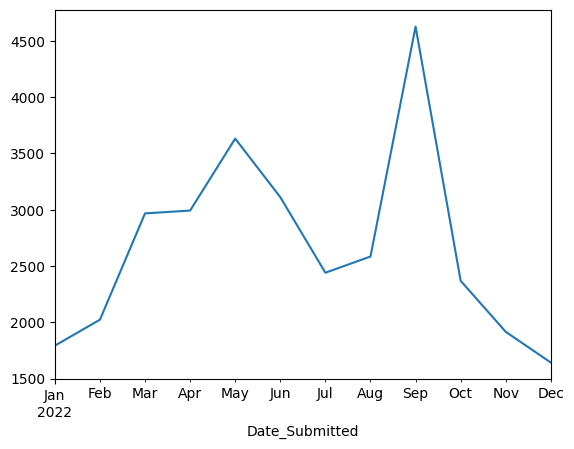

In [24]:
monthly_issues.plot()

**Count of issues by request form submissions**

In [25]:

formCounts = cityline22.Report_Source.value_counts()

print(formCounts) 

formPercents = cityline22.Report_Source.value_counts(normalize=True) 

print(formPercents)

Report_Source
Request Form     25124
iPhone            3120
Portal            2606
Android            801
Web - Mobile       327
Web - Desktop      125
Name: count, dtype: int64
Report_Source
Request Form     0.782606
iPhone           0.097187
Portal           0.081176
Android          0.024951
Web - Mobile     0.010186
Web - Desktop    0.003894
Name: proportion, dtype: float64


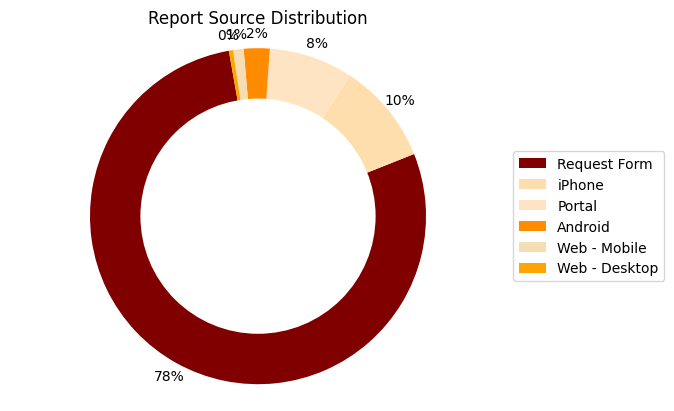

In [26]:
# Calculate percentages
formPercents = cityline22['Report_Source'].value_counts(normalize=True) #Get the count of each Report source, then normalize

# Create a pie chart with % labels(using autopct) outside the pie (using pctdistance and labeldistance), and specific color scheme (using colors)
plt.pie(formPercents, autopct='%1.0f%%', startangle=100, pctdistance=1.09, colors=['maroon', 'navajowhite', 'bisque', 'darkorange','wheat','orange'], labeldistance=5.7)

#Used to make pie chart a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Maintain shape and location of plot
plt.legend(labels=formPercents.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)

# Add title
plt.title('Report Source Distribution')

# Show the plot
plt.show()

**Sla ranges**

In [27]:
cityline22.Sla_in_hours.unique()

array([  72.,   48.,  120.,   24.,   96.,  360., 1344.,  288.,  504.])

**Number of Slas per agency**

In [28]:
#SLA range count for each agency 

# Use groupby and count to get the count of assignee per agency 2022 DATA 
slaCount= cityline22.groupby('Agency_Name')['Sla_in_hours'].nunique().reset_index()

# Rename the columns for clarity (optional)
slaCount.columns = ['Category', 'SLA Range']

print(slaCount)

                                 Category  SLA Range
0                                 Animals          2
1                    Feedback to the City          1
2           Garbage, Recycling & Graffiti          6
3  Green Spaces, Trees & Public Utilities          3
4        Health, Safety & Social Services          1
5          Housing & Property Maintenance          2
6                      Parking & Vehicles          3
7     Streets, Sidewalks & Transportation          5
8                          Water & Sewage          1


**Number of Slas per agency**

In [29]:
slaTypes= cityline22.groupby('Agency_Name')
SLAs = slaTypes['Sla_in_hours'].value_counts()
done = pd.DataFrame(SLAs).sort_values(['Agency_Name'])
done

count
Agency_Name                            Sla_in_hours       
Animals                                24.0            129
                                       48.0             23
Feedback to the City                   24.0             90
Garbage, Recycling & Graffiti          48.0          13614
                                       72.0           3851
                                       24.0           1717
                                       96.0           1693
                                       504.0           284
                                       120.0           163
Green Spaces, Trees & Public Utilities 72.0            165
                                       24.0              7
                                       1344.0          302
Health, Safety & Social Services       48.0             26
Housing & Property Maintenance         48.0           2009
                                       96.0            272
Parking & Vehicles                     72.0             90
                                       48.0             77
                                       120.0            31
Streets, Sidewalks & Transportation    288.0            53
                                       120.0          1330
                                       48.0            449
                                       360.0           340
                                       96.0            294
Water & Sewage                         24.0           5094

In [30]:
#Create dataframes of SLA values
day = cityline22[cityline22['Sla_in_hours'] == 24]
tdays = cityline22[cityline22['Sla_in_hours'] == 48]
thdays = cityline22[cityline22['Sla_in_hours'] == 72]
fdays = cityline22[cityline22['Sla_in_hours'] == 96]
fvdays = cityline22[cityline22['Sla_in_hours'] == 120]
tweeks = cityline22[cityline22['Sla_in_hours'] == 288]
thweeks = cityline22[cityline22['Sla_in_hours'] == 360]
mweeks = cityline22[cityline22['Sla_in_hours'] == 504]
months = cityline22[cityline22['Sla_in_hours'] == 1344]

#Count value occurances in agency name column
d = day.Agency_Name.value_counts()
t = tdays.Agency_Name.value_counts()
th = thdays.Agency_Name.value_counts()
f = fdays.Agency_Name.value_counts()
fv = fvdays.Agency_Name.value_counts()
tw = tweeks.Agency_Name.value_counts()
thw = thweeks.Agency_Name.value_counts()
mw = mweeks.Agency_Name.value_counts()
m = months.Agency_Name.value_counts()

#Combine data into single dataframe
Sla_group = pd.DataFrame({ '24' : d, '48' : t,  '72' : th, '96' : f ,  '120' : fv, '288' : tw ,  '360' : thw,  '504' : mw,  '1344' : m  })
Sla_group

,24,48,72,96,120,288,360,504,1344
Agency_Name,,,,,,,,,
Animals,129.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Feedback to the City,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Garbage, Recycling & Graffiti",1717.0,13614.0,3851.0,1693.0,163.0,NaN,NaN,284.0,NaN
"Green Spaces, Trees & Public Utilities",7.0,NaN,165.0,NaN,NaN,NaN,NaN,NaN,302.0
"Health, Safety & Social Services",NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Housing & Property Maintenance,NaN,2009.0,NaN,272.0,NaN,NaN,NaN,NaN,NaN
Parking & Vehicles,NaN,77.0,90.0,NaN,31.0,NaN,NaN,NaN,NaN
"Streets, Sidewalks & Transportation",NaN,449.0,NaN,294.0,1330.0,53.0,340.0,NaN,NaN
Water & Sewage,5094.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###   HOW WELL DID THE CITY RESOLVE REQUESTS IN 2022 ### 

#Count of agencies and assignees - Done  
#Count of assignee per agency - Done  
#Count of issues by agency name  - AGENCY WITH THE MOST REQUESTS, Certain agencies handle way more requests than others - Done  
#Count of issues by month  - MONTH WITH THE MOST REQUESTS, anything notable - Done
#Count of submissions by request type - how do requests get looked at  - most people still prefer to submit paper forms versus electronic - Done  
#Sla range for each category - which agencies take the longest - Done  
#Avg Resolution Time by agency name  QUICKEST AGENCIES, certain agencies require more time to resolve issues than others wide spread  

**What we learned**  
#Agency that received the most requests = Garbage, Recycling & Graffiti Dept.  
#Requests were assgined out to 56 different indiviuals and teams  
#September received the most requests and requests declined from there  
#Majority of requests get submitted by paper form  
#SLAs range from 24 to 1344 hours